In [145]:
# First let's import the packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv('movies.csv')

#Viewing the data

# Exploring Trends in the Movie Industry Using Data Analytics

The movie industry is a dynamic and fast-evolving sector, where data can uncover hidden trends and insights that influence everything from box office success to casting decisions. In this project, I analyze a comprehensive dataset from Kaggle, featuring key aspects of the movie industry such as revenue, budgets, genres, and critical ratings. Using advanced data analysis techniques, I aim to answer essential questions, including what drives box office performance, how genres influence success, and the relationship between production budget and profitability. This analysis provides valuable insights into the factors shaping the global film industry today.

In [147]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


#Checking for missing data

In [149]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


#Replacing the null values with the mode for the particular columns

In [151]:
for col in df.columns:
    mode_value = df[col].mode()[0]  # Get the mode of the column
    df[col].fillna(mode_value, inplace=True)  # Replace NaN with the mode


#Confirming if the null values are removed

In [153]:
print(df.isnull().sum())

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64


#Checking the data types

In [155]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


From the dataset we can notice the budget and the gross columns have a .0 in the values, so we remove the .0 to change the data types

In [157]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')


In [161]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


To create a new month column
create a new column taking the first 4 values to make our new year column

In [163]:
#creating a correct year column
df['month'] = df['released'].astype(str).str[:4]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July


To order by Gross revenue

In [165]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri


#Checking for Duplicates

In [85]:
#drop any duplicates
df['company'].drop_duplicates().sort_values(ascending = False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
5813                        10 West Studios
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 2385, dtype: object

In [87]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,14000000,Universal Pictures,90.0,Octo
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,20000000,14000000,Cactus Blue Entertainment,90.0,Febr
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,14000000,Embi Productions,97.0,Apri
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",6.6,13000.0,James Randall,James Randall,Christina Roz,United States,15000,14000000,Universal Pictures,120.0,Octo


# Checking for correlation
# Budget high correlation
# Company high correlation

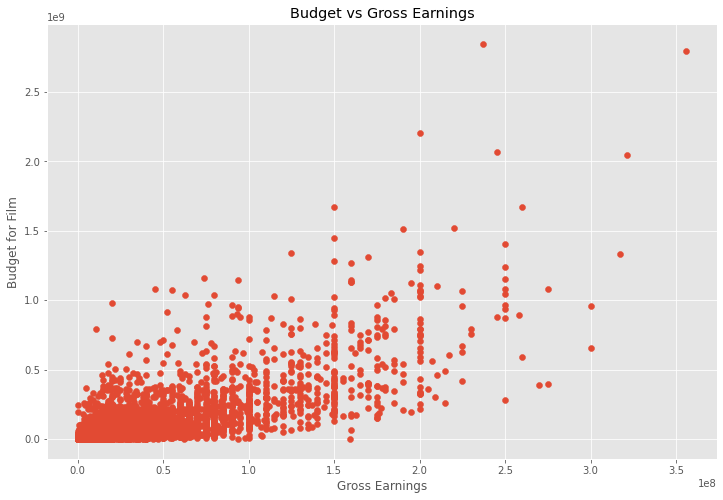

In [99]:
# Scatter plot with budget vs gross revenue

plt.scatter(x = df['budget'], y = df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

In [95]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri


<AxesSubplot:xlabel='budget', ylabel='gross'>

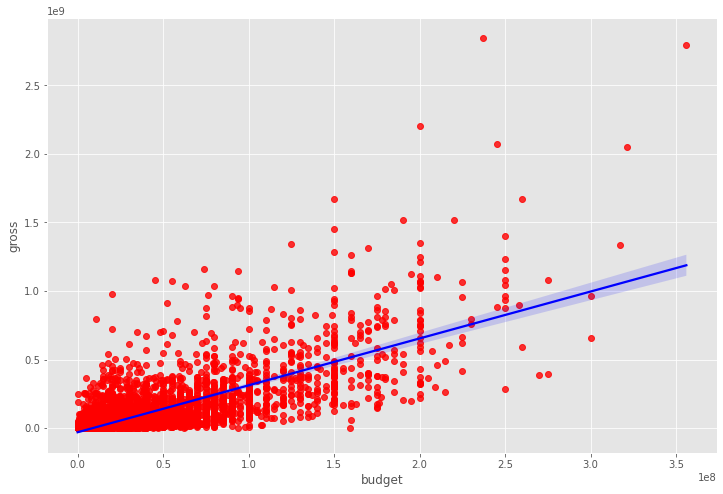

In [105]:
# Plotting the budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

# Checking Correlations

methods inculde pearson, kendall, spearman

In [109]:
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.098084,0.222485,0.292360,0.260251,0.120431
score,0.098084,1.000000,0.409123,0.061775,0.185799,0.399543
votes,0.222485,0.409123,1.000000,0.462013,0.632376,0.309150
budget,0.292360,0.061775,0.462013,1.000000,0.746670,0.273507
gross,0.260251,0.185799,0.632376,0.746670,1.000000,0.244711
runtime,0.120431,0.399543,0.309150,0.273507,0.244711,1.000000


It is evident that there is a high correlation between budget and gross

<function matplotlib.pyplot.show(close=None, block=None)>

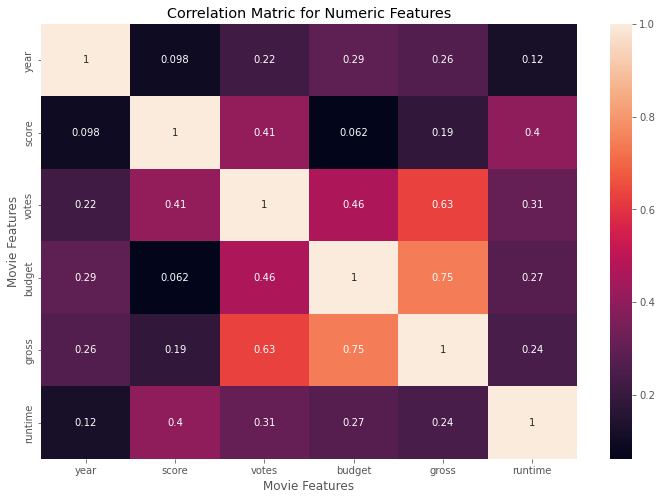

In [119]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show

In [121]:
# Checking Company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri


The company columns consists of strings therefore we can change them to numeric to include them in the correlation matrix

In [167]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,10
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,8
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,10
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,10
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,8


<function matplotlib.pyplot.show(close=None, block=None)>

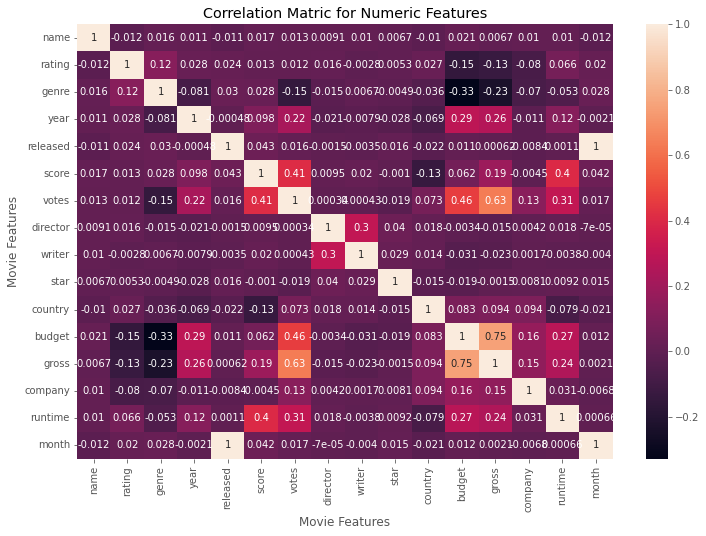

In [129]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show

In [131]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
name,1.000000,-0.012441,0.016355,0.011453,-0.011087,0.017114,0.013045,0.009079,0.010018,0.006749,-0.010425,0.020926,0.006721,0.010369,0.010214,-0.012343
rating,-0.012441,1.000000,0.123465,0.027931,0.023643,0.013304,0.012253,0.016255,-0.002795,0.005314,0.026930,-0.148192,-0.130496,-0.079626,0.066499,0.020036
genre,0.016355,0.123465,1.000000,-0.081261,0.029997,0.027970,-0.145294,-0.015258,0.006746,-0.004856,-0.035896,-0.328865,-0.233674,-0.070013,-0.052759,0.027960
year,0.011453,0.027931,-0.081261,1.000000,-0.000484,0.098084,0.222485,-0.020795,-0.007901,-0.027745,-0.069423,0.292360,0.260251,-0.011438,0.120431,-0.002132
released,-0.011087,0.023643,0.029997,-0.000484,1.000000,0.042703,0.015930,-0.001492,-0.003461,0.015550,-0.022042,0.011002,0.000624,-0.008443,0.001117,0.995317
score,0.017114,0.013304,0.027970,0.098084,0.042703,1.000000,0.409123,0.009522,0.019700,-0.001031,-0.134538,0.061775,0.185799,-0.004547,0.399543,0.041560
votes,0.013045,0.012253,-0.145294,0.222485,0.015930,0.409123,1.000000,0.000336,0.000432,-0.019341,0.073500,0.462013,0.632376,0.130533,0.309150,0.017104
director,0.009079,0.016255,-0.015258,-0.020795,-0.001492,0.009522,0.000336,1.000000,0.299512,0.039715,0.017926,-0.003361,-0.014808,0.004250,0.017583,-0.000070
writer,0.010018,-0.002795,0.006746,-0.007901,-0.003461,0.019700,0.000432,0.299512,1.000000,0.028745,0.014409,-0.030961,-0.023007,0.001665,-0.003751,-0.003956
star,0.006749,0.005314,-0.004856,-0.027745,0.015550,-0.001031,-0.019341,0.039715,0.028745,1.000000,-0.014749,-0.018863,-0.001529,0.008072,0.009208,0.015164


In [137]:
# Unstacking, getting the ones with the highest correlation

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name      name        1.000000
          rating     -0.012441
          genre       0.016355
          year        0.011453
          released   -0.011087
          score       0.017114
          votes       0.013045
          director    0.009079
          writer      0.010018
          star        0.006749
          country    -0.010425
          budget      0.020926
          gross       0.006721
          company     0.010369
          runtime     0.010214
          month      -0.012343
rating    name       -0.012441
          rating      1.000000
          genre       0.123465
          year        0.027931
          released    0.023643
          score       0.013304
          votes       0.012253
          director    0.016255
          writer     -0.002795
          star        0.005314
          country     0.026930
          budget     -0.148192
          gross      -0.130496
          company    -0.079626
          runtime     0.066499
          month       0.020036
genre   

In [135]:
pd.set_option('display.max_rows', None)

In [139]:
# To sort to see the ones with a high correlation

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget    genre      -0.328865
genre     budget     -0.328865
          gross      -0.233674
gross     genre      -0.233674
budget    rating     -0.148192
rating    budget     -0.148192
genre     votes      -0.145294
votes     genre      -0.145294
country   score      -0.134538
score     country    -0.134538
rating    gross      -0.130496
gross     rating     -0.130496
genre     year       -0.081261
year      genre      -0.081261
rating    company    -0.079626
company   rating     -0.079626
country   runtime    -0.079385
runtime   country    -0.079385
genre     company    -0.070013
company   genre      -0.070013
country   year       -0.069423
year      country    -0.069423
runtime   genre      -0.052759
genre     runtime    -0.052759
country   genre      -0.035896
genre     country    -0.035896
writer    budget     -0.030961
budget    writer     -0.030961
star      year       -0.027745
year      star       -0.027745
gross     writer     -0.023007
writer    gross      -0.023007
released

In [141]:
high_corr = sorted_pairs[(sorted_pairs)> 0.5]

high_corr

gross     votes       0.632376
votes     gross       0.632376
gross     budget      0.746670
budget    gross       0.746670
month     released    0.995317
released  month       0.995317
name      name        1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
runtime   runtime     1.000000
month     month       1.000000
dtype: float64

We can see that votes and budget have the highest correlation to gross earnings

Company has low correlation